In [4]:
import pandas as pd
import numpy as np

# Synthetic dataset create karna
np.random.seed(42)
data = {
    "inclination": np.random.uniform(0, 98, 20),
    "eccentricity": np.random.uniform(0, 0.1, 20),
    "mean_motion": np.random.uniform(11, 16, 20),
    "raan": np.random.uniform(0, 360, 20),
    "arg_perigee": np.random.uniform(0, 360, 20),
    "mean_anomaly": np.random.uniform(0, 360, 20),
    "label": np.random.choice([0, 1], size=20)  # 0 = Satellite, 1 = Debris
}

df = pd.DataFrame(data)

# Save as CSV in Colab environment
df.to_csv("tle_dataset_sample.csv", index=False)

print("✅ Dataset created and saved as tle_dataset_sample.csv")
print(df.head())


✅ Dataset created and saved as tle_dataset_sample.csv
   inclination  eccentricity  mean_motion        raan  arg_perigee  \
0    36.704932      0.061185    11.610191  139.923824   310.717233   
1    93.170002      0.013949    13.475885   97.685651   224.387326   
2    71.735406      0.029214    11.171943  298.345503   119.123289   
3    58.668531      0.036636    15.546602  128.431198    22.881006   
4    15.289827      0.045607    12.293900  101.136423   111.953636   

   mean_anomaly  label  
0     11.314507      1  
1    229.107748      0  
2    113.168153      1  
3    183.085449      0  
4    326.723931      0  


In [5]:
# ======================================
# Space Debris vs Satellite Classification
# Using TLE Dataset + ML Classifiers
# ======================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------------
# 1. Load Dataset
# -------------------------
# Example: Load TLE dataset (CelesTrak data converted to CSV)
# CSV should have features like: inclination, eccentricity, mean_motion, etc.
df = pd.read_csv("tle_dataset_sample.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# -------------------------
# 2. Features & Labels
# -------------------------
X = df.drop("label", axis=1)   # Features (orbital parameters)
y = df["label"]                # Label: 0 = Satellite, 1 = Debris

# -------------------------
# 3. Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. Data Scaling
# -------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------
# 5. Model Training (Random Forest)
# -------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -------------------------
# 6. Predictions
# -------------------------
y_pred = rf.predict(X_test)

Dataset Shape: (20, 7)
   inclination  eccentricity  mean_motion        raan  arg_perigee  \
0    36.704932      0.061185    11.610191  139.923824   310.717233   
1    93.170002      0.013949    13.475885   97.685651   224.387326   
2    71.735406      0.029214    11.171943  298.345503   119.123289   
3    58.668531      0.036636    15.546602  128.431198    22.881006   
4    15.289827      0.045607    12.293900  101.136423   111.953636   

   mean_anomaly  label  
0     11.314507      1  
1    229.107748      0  
2    113.168153      1  
3    183.085449      0  
4    326.723931      0  


In [6]:
# -------------------------
# 7. Evaluation
# -------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



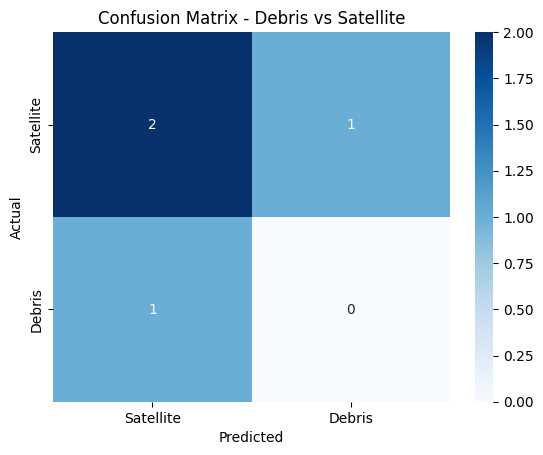

In [7]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Satellite", "Debris"],
            yticklabels=["Satellite", "Debris"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Debris vs Satellite")
plt.show()

In [8]:
# -------------------------
# 8. Feature Importance
# -------------------------
importances = rf.feature_importances_
feature_names = df.drop("label", axis=1).columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:\n", feat_imp)


Feature Importances:
 mean_motion     0.228669
eccentricity    0.208480
mean_anomaly    0.158668
raan            0.154974
inclination     0.147786
arg_perigee     0.101423
dtype: float64


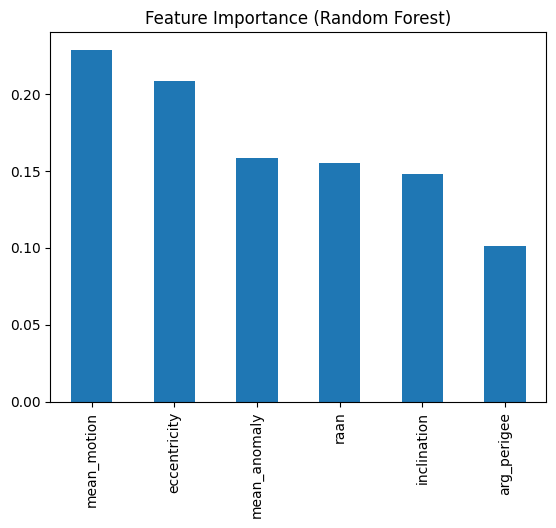

In [9]:
# Plot feature importance
feat_imp.plot(kind='bar', title="Feature Importance (Random Forest)")
plt.show()